In [1]:
name = "Alex Aaltonen"
id = 2423702

In [2]:
# Select the data file based on your student ID
n = id % 5 # Take the modulo 5 of your student ID
num_list = [3, 4, 6, 8, 9] # List of numbers to select from
filename = f'./data/bidmc_{num_list[n]:02d}_Signals.csv'
print(f'Filename: {filename}')

Filename: ./data/bidmc_06_Signals.csv


In [3]:
# Run if needed
#%pip install numpy pandas matplotlib scipy

In [4]:
# Read necessary libraries and functions
import numpy as np                  # for numerical operations
import matplotlib.pyplot as plt     # for plotting
import pandas as pd                 # for reading data
from scipy.signal import find_peaks # for peak detection
import os                           # for file operations

In [5]:
# Print the list of files in the ./data directory
os.listdir('./data')

['bidmc_02_Fix.txt',
 'bidmc_02_Signals.csv',
 'bidmc_03_Fix.txt',
 'bidmc_03_Signals.csv',
 'bidmc_04_Fix.txt',
 'bidmc_04_Signals.csv',
 'bidmc_06_Fix.txt',
 'bidmc_06_Signals.csv',
 'bidmc_08_Fix.txt',
 'bidmc_08_Signals.csv',
 'bidmc_09_Fix.txt',
 'bidmc_09_Signals.csv']

In [6]:
# Read the data
data = pd.read_csv(filename)

# Get PPG signal and create time vector
ppg = data[' PLETH']
ts = 0.008 # Sample time in seconds
fs = 1/ts # Sample rate (Hz), samples per second
t = np.arange(len(ppg))*ts

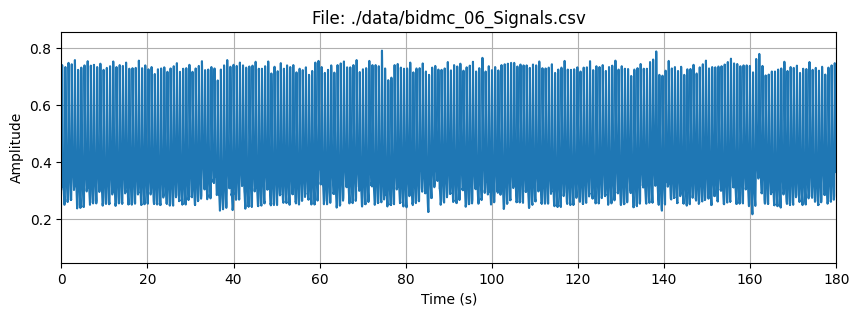

In [7]:
# Plot 180 seconds of the full signal
plt.figure(figsize = (10, 3))
plt.plot(t, ppg)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'File: {filename}')
plt.xlim(0, 180)
plt.grid()
plt.show()

In [8]:
# Continue coding here ...

In [9]:
# Remember to add your interpretations ...

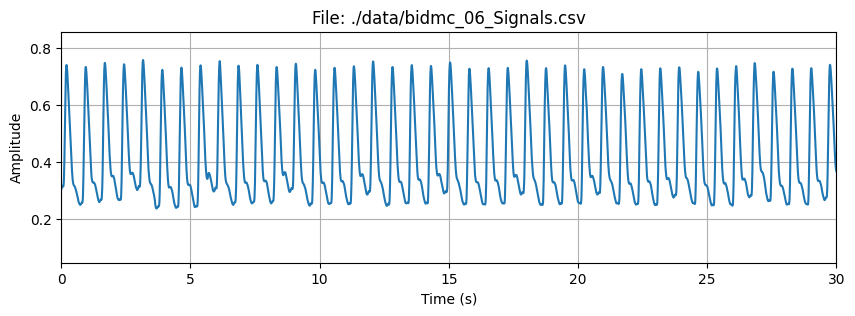

In [10]:
plt.figure(figsize = (10, 3))
plt.plot(t, ppg)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'File: {filename}')
plt.xlim(0, 30) # Zoomaa --> pienempi tarkastelu aika
plt.grid()
plt.show()

In [11]:
#find peakes --> using library, not available for project
peaks, properties = find_peaks(ppg, height=0.5)


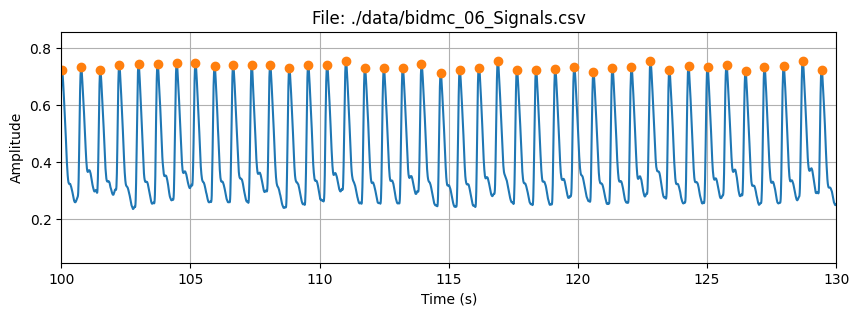

In [12]:
peaks, properties = find_peaks(ppg, height=0.5, distance=50)
# distance is good if you want to discard double spikes --> sets minimun interval
# Plot the ppg signal and the peaks
plt.figure(figsize = (10, 3))
plt.plot(t, ppg)
plt.plot(t[peaks], ppg[peaks], 'o')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'File: {filename}')

# Zoom in from 100 to 130 seconds
plt.xlim(100, 130) 

plt.grid()
plt.show()

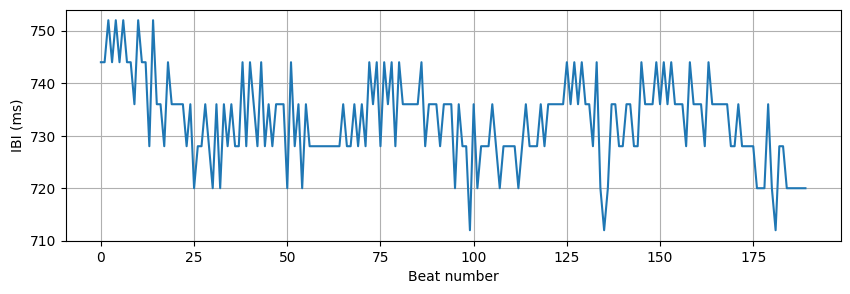

In [13]:
# Calculate the inter-beat intervals (IBI)
ppi = np.diff(peaks)*ts*1000 # in milliseconds

# Example: select the beats with IBI between 600 and 800 ms
# Uncomment and modify, if needed
# >, > are used to discard errors in testing --> values that are not possible like heart being stopped for over 4 seconds
i = (ppi > 700) & (ppi < 780)
ppi = ppi[i]

# Example: select the beats from 10 to 310. 
# Uncomment  and modify, if needed
ppi = ppi[10:200] # zoomaa --> pienenmpi tarkastelu jakso

# Plot the IBI
plt.figure(figsize = (10, 3))
plt.plot(ppi)
plt.xlabel('Beat number')
plt.ylabel('IBI (ms)')
plt.grid()
plt.show()

In [14]:
# Calculate the average IBI
mean_ppi = np.mean(ppi)
print(f'Mean IBI: {mean_ppi:.2f} ms')

# Calculate the heart rate
hr = 60000/mean_ppi
print(f'Heart rate: {hr:.2f} bpm')
#mean_hr = np.mean(hr)
#print(f'Mean Heart rate: {hr:.2f} bpm')

Mean IBI: 732.93 ms
Heart rate: 81.86 bpm


In [15]:
ppi

# Some numpy functions
ppi_sqrt = np.sqrt(ppi) # Square root
ppi_2 = ppi**2 # Square
ppi_diff = np.diff(ppi) # Difference
ppi_mean = np.mean(ppi) # Mean
ppi_std = np.std(ppi) # Standard deviation
ppi_rmssd = np.sqrt(np.mean(np.diff(ppi)**2)) # Root mean square of successive differences

# Print the results
#print(f'Original: {x}')
#print('Square roots:', [np.round(val,2) for val in x_sqrt])
#print(f'Squares: {x_2}')
#print(f'Differences: {x_diff}')
print(f'Mean IBI: {ppi_mean:.2f}')
print(f'SDNN: {ppi_std:.2f}')
print(f'RMSSD: {ppi_rmssd:.2f}')
print(f'Heart Rate: {hr:.2f}')

Mean IBI: 732.93
SDNN: 8.06
RMSSD: 9.37
Heart Rate: 81.86


Questions

1. Was the mean heart rate (in BPM) low or high?

Mean heart rate in bpm was 81.86 bpm. The normative mean hear rate is 66 bpm so the heart rate was high.


2. Was the mean PPI (in milliseconds) low or high?

Mean PPI was 732.93 ms. PPI is low which means the heart beats faster. 


3. How much variation was there in the PPI values (SDNN and RMSSD)?

Variation for SDNN is 8.06ms and for RMSSD its 9.37ms.

4. Was the variation low or high?

For both SDNN and RMSSD the variation is really low. 

5. Compare these values to the given normal values (see the lectrure notes) and interpret the recovery and/or stress level of the patient

RMSSD and SDNN variation are lower than normal and it is assosiated with high stress levels and reduced recovery. 

